# Assignment 2: Evaluating Linear Models

-----------------------

**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

-------------------------------

**Your Name Here:**

Put all of your skills to work on a basic modeling example! And let's see if we can use ChatGPT to help deepen your learning on this topic.

First things first, [Download the CT Real Estate Transactions data here](https://drive.google.com/file/d/12m6UYYt0Osa3JLLfPZRLlBipRUS9ixGd/view?usp=sharing), drag onto your Google Drive, make a shareable link and download it with `!gdown`, then read the dataframe as `df`. Then...


In [3]:
# here is a nice way to download as a shareable link - you just need to 'steal' the ID of the file and you can use gdown
# after you run this, the file will be downloaded to your local runtime and your are ready to rock!
# of course, local files on your runtime are deleted after you close the session, but this is OK.

# https://drive.google.com/file/d/1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ/view?usp=sharing
!gdown 1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ

Downloading...
From: https://drive.google.com/uc?id=1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ
To: /content/Real_Estate_Sales_2014-2016.csv
100% 15.4M/15.4M [00:00<00:00, 142MB/s]


In [4]:
import pandas as pd
df = pd.read_csv('Real_Estate_Sales_2014-2016.csv')


# Part 1a: Use ChatGPT to generate a regression recipe
I used to give this as the homework, where students had to reference my materials and documentation to solve this notebook. ChatGPT is actually pretty slick  and can generate a basic regression recipe for you. So... why not see what it can do?! Copy and paste these instructions into ChatGPT and ask it to write a Python code to solve this homework. Copy and paste it, update it if needed, and run it.

* Q1) Drop any rows where the `AssessedValue` is greater than 1 million USD
* Q2) Count how many rows have missing values, then drop any rows with missing values.
* Q3) Examine the head of the dataframe and check the column types using .info() to ensure that all numeric columns are appropriately converted as such.
* Q4) Count how many unique values are in the `Town` column.
* Q5) Make a new dataframe called `tmp` of dummy variables for each value in the `Town` column. (hint: this dataframe should have somewhere around 127055 rows and 169 columns, one column for each town).
* Q6) Make a new dataframe called `X` that subsets the `AssessedValue` and `ListYear` from `df`, and concatenate with your dataframe called `tmp`. Hint: This dataframe should have 171 columns.
* Q7) Subset `SaleAmount` from `df` and assign to a variable called `y`.
* Q8) Convert `X` and `y` to numpy arrays. Split your data in X_train, X_test, y_train, y_test using your 7 digit student ID as the random seed and an 80/20 split.
* Q9) Fit a linear regression model. Calculate mean absolute error for each partition.
* Q10) Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers. You should use a log axis each axis so that outliers don't dominate your plot.

* `plt.xscale('log')`
* `plt.yscale('log')`

Please use nice subheaders for each question so that your code is easy to review.



## Your ChatGPT Screenshot
Make sure the screenshot of time and date is included in the image.

In [5]:
# students: paste both a screenshot of your prompt and code

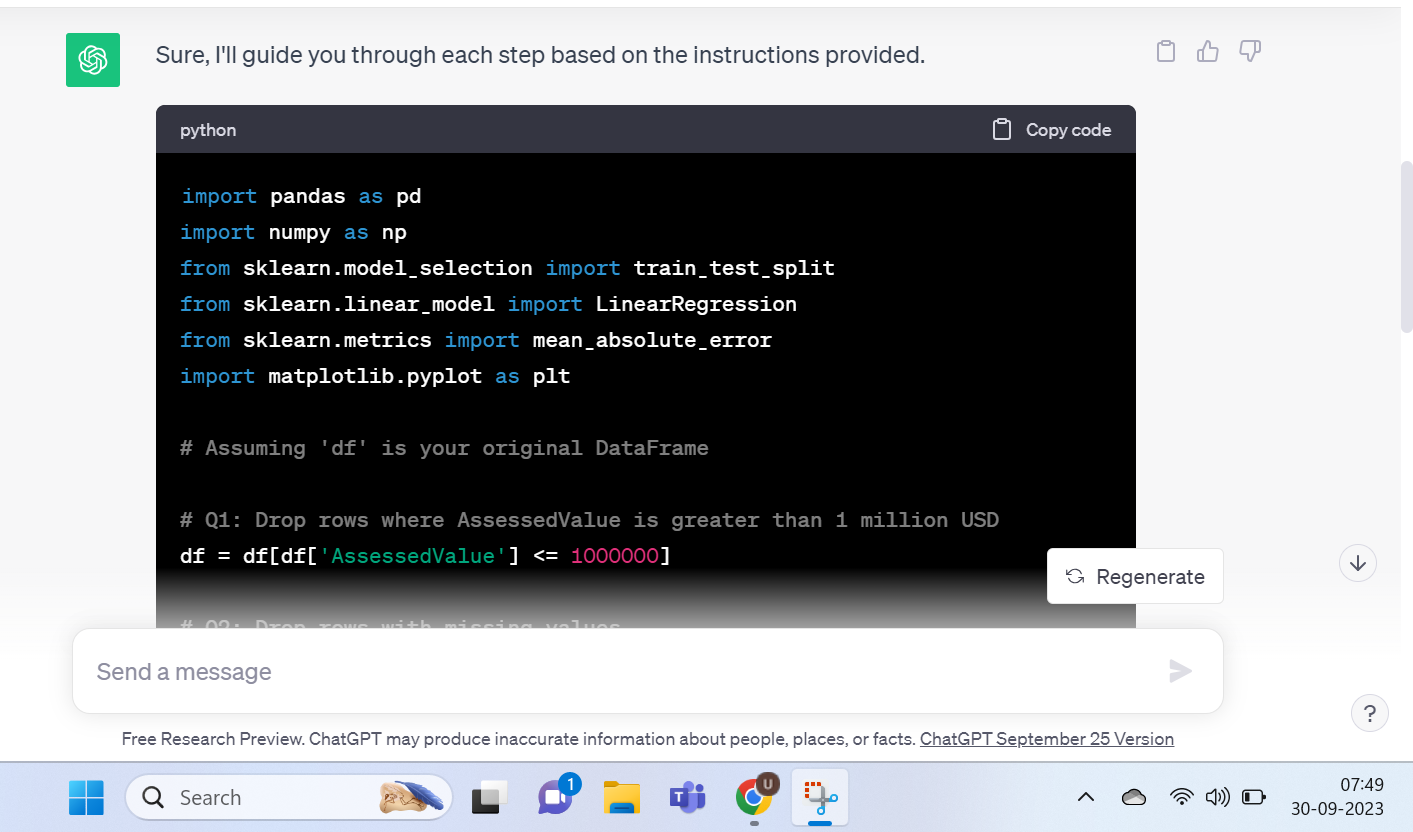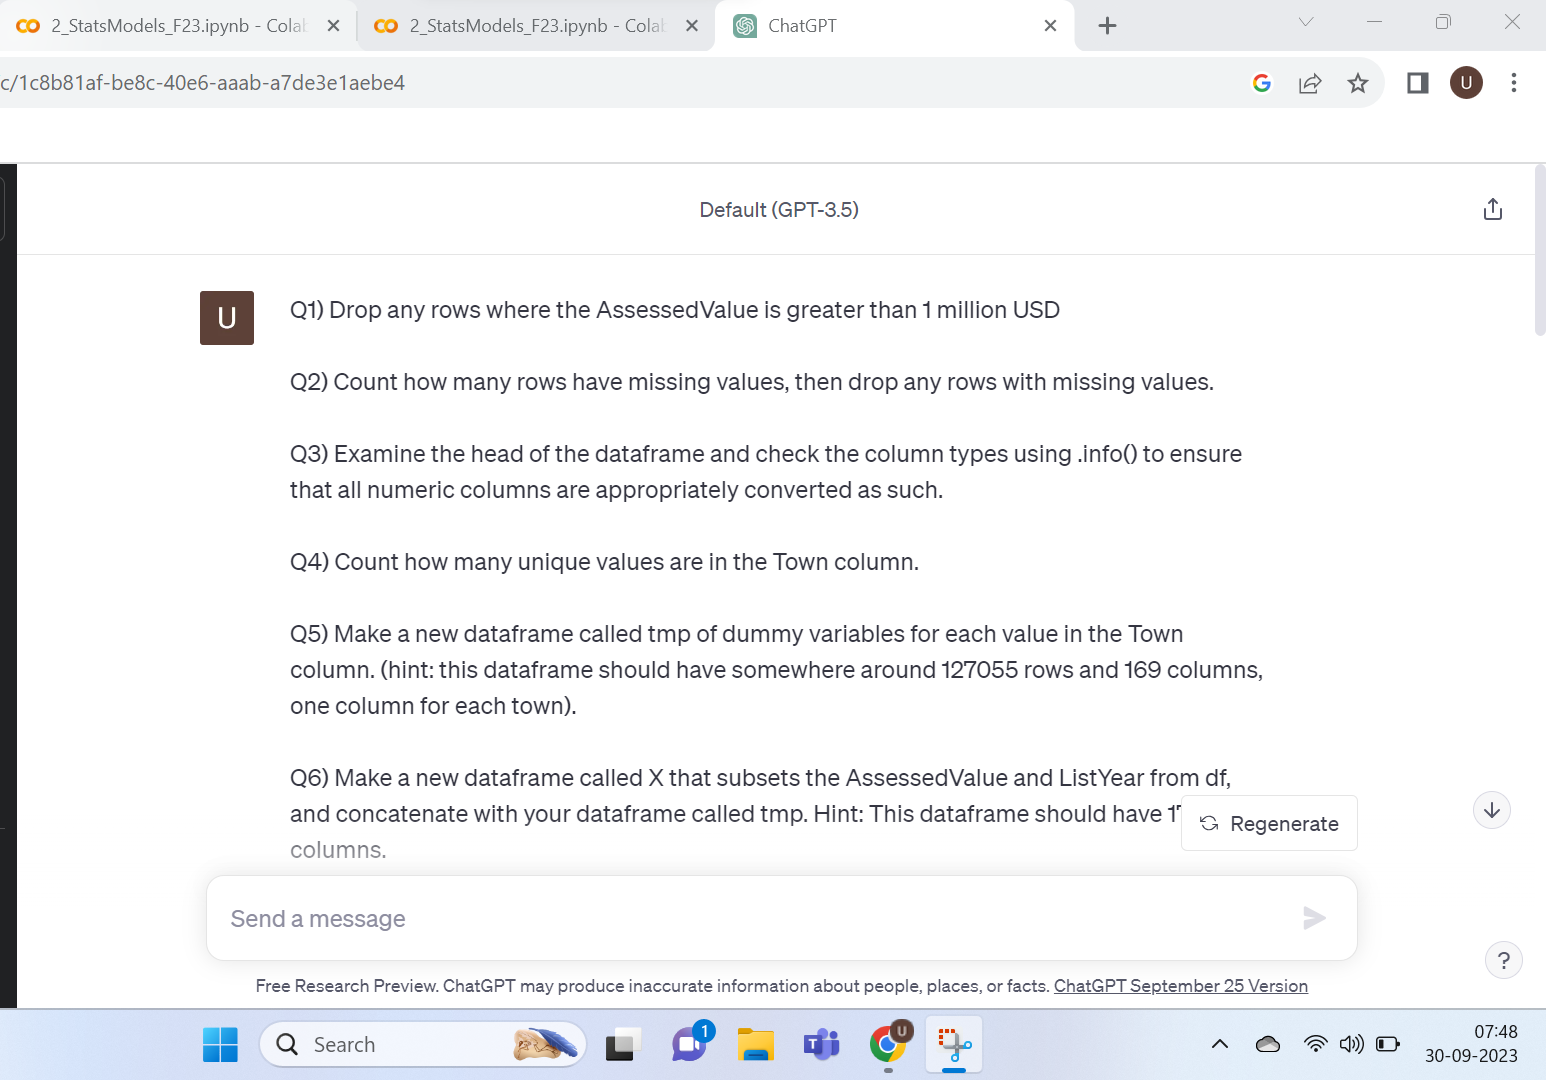

## Your ChatGPT Code
Don't just copy/paste as one cell, make nice subheaders for each question please.

In [6]:
# (for academic integrity) and your actual ChatGPT python code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Assuming 'df' is your original DataFrame

## Q1: Drop rows where AssessedValue is greater than 1 million USD

In [7]:
# Q1: Drop rows where AssessedValue is greater than 1 million USD
df = df[df['AssessedValue'] <= 1000000]

## Q2: Drop rows with missing values

In [8]:
# Q2: Drop rows with missing values
df.dropna(inplace=True)

## Q3: Check column types and examine the head of the DataFrame

In [9]:
# Q3: Check column types and examine the head of the DataFrame
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127055 entries, 1 to 145941
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               127055 non-null  int64  
 1   SerialNumber     127055 non-null  int64  
 2   ListYear         127055 non-null  int64  
 3   DateRecorded     127055 non-null  object 
 4   Town             127055 non-null  object 
 5   Address          127055 non-null  object 
 6   AssessedValue    127055 non-null  int64  
 7   SaleAmount       127055 non-null  float64
 8   SalesRatio       127055 non-null  float64
 9   PropertyType     127055 non-null  object 
 10  ResidentialType  127055 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 11.6+ MB
None
   ID  SerialNumber  ListYear DateRecorded     Town            Address  \
1   2         14011      2014    1/14/2015  Andover    1 JUROVATY LANE   
2   3         15006      2015   11/30/2015  Andover        1 R

## Q4: Count unique values in the Town column

In [10]:
# Q4: Count unique values in the Town column
unique_towns_count = df['Town'].nunique()
print("Unique Towns Count:", unique_towns_count)

Unique Towns Count: 169


## Q5: Create dummy variables for the Town column

In [11]:
# Q5: Create dummy variables for the Town column
tmp = pd.get_dummies(df['Town'])

## Q6: Create X DataFrame by subsetting AssessedValue, ListYear, and concatenating with tmp

In [12]:
# Q6: Create X DataFrame by subsetting AssessedValue, ListYear, and concatenating with tmp
X = pd.concat([df[['AssessedValue', 'ListYear']], tmp], axis=1)

## Q7: Subset SaleAmount and assign to y

In [13]:
# Q7: Subset SaleAmount and assign to y
y = df['SaleAmount']

## Q8: Convert X and y to numpy arrays and split the data into training and testing sets

In [14]:
# Q8: Convert X and y to numpy arrays and split the data into training and testing sets
# Replace '1234567' with your 7-digit student ID
seed = int('1234567')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## Q9: Fit a linear regression model and calculate mean absolute error for each pa

In [15]:
# Q9: Fit a linear regression model and calculate mean absolute error for each partition
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Mean Absolute Error (Train):", mae_train)
print("Mean Absolute Error (Test):", mae_test)

Mean Absolute Error (Train): 93457.16956023884
Mean Absolute Error (Test): 88402.45194323063


## Q10: Create scatter plots of actual vs. predicted values with log axes

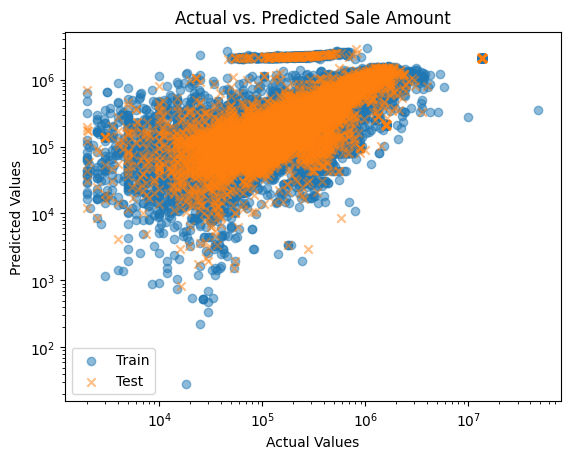

In [16]:
# Q10: Create scatter plots of actual vs. predicted values with log axes
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.5, marker='o')
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.5, marker='x')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Sale Amount')
plt.legend()
plt.show()

# Part 1b: Compare and contrast with Dave's regression examples

You now have an AI-generated code vs. the class materials - and I think you would agree both are pretty good! Take some time to the ChatGPT script vs. the class notes and come up with five observations of what is similar vs. different between the two examples. What is in Dave's materials that are not in the AI-generated code? And vice-versa?

### Observation 1

The method to filter data df = df[df['AssessedValue'] <= 1000000] generated by AI is similar to what was tought in class.

### Observation 2

The optimized method to update the data frame by using inplace = True is similar to class materials.

### Observation 3

Use of .nunique() method to het the count of distinct values in a column by AI is something similar with what is used in class examples.

### Observation 4

pd.get_dummies feature engineering method to deal with categorical variables and the concept of one-hot encoding is something new to learn.
If I am not wrong we usually convert cateforical variables to numeric uing pd.numeric.

### Observation 5

The metric to evaluate model used in boston housing (a real estate domain) in class and automatically used by AI for the same domainis MAE.

ALthough I wonder if we humans are much smarter than AI cause we actually have the ability to evaluate our model on various different metric and choose to go with one over other based on the domain of the dataset and our general instincts about the data while AI can't do the same.

Which might be good news for analyst as AI won't be taking their job!!
Just kidding please ignore what I said just a funny thought in my head.

But professor I would really like to know if I am correct on this.

# Part 2a: Now ask ChatGPT to generate a classification recipe
With you active ChatGPT open, ask this question (or something similar):

*'Instead of a regression problem, can you update the script to be a classification problem where the target variable is 0/1 based on if the AssessedValue is greater than the mean value in that column?'*

## Your ChatGPT Screenshot
Make sure the screenshot of time and date is included in the image.

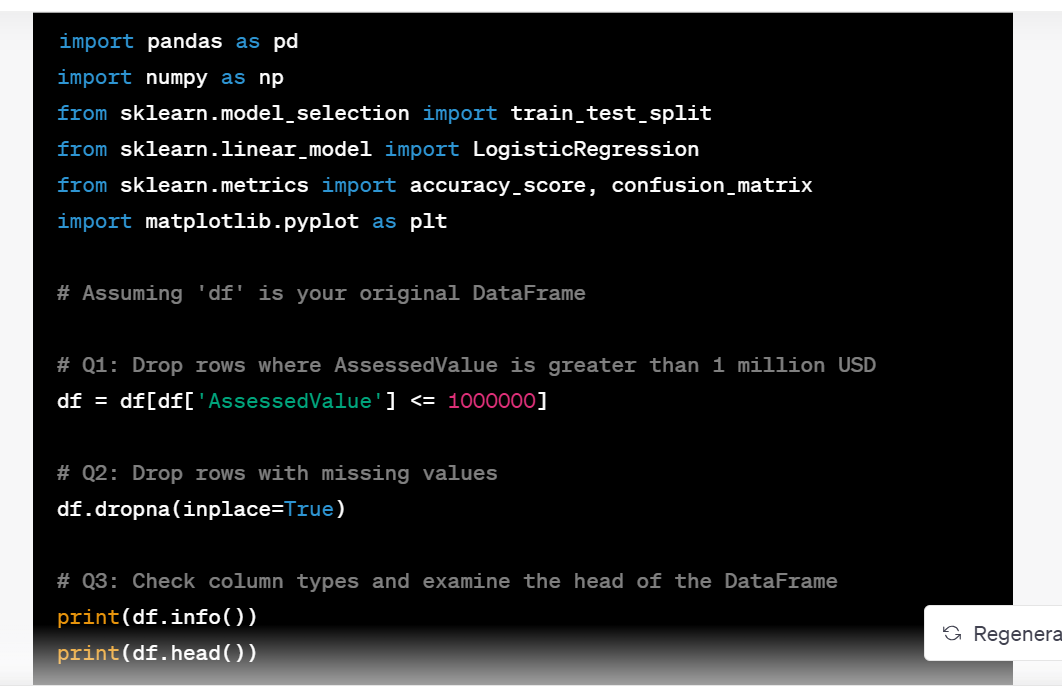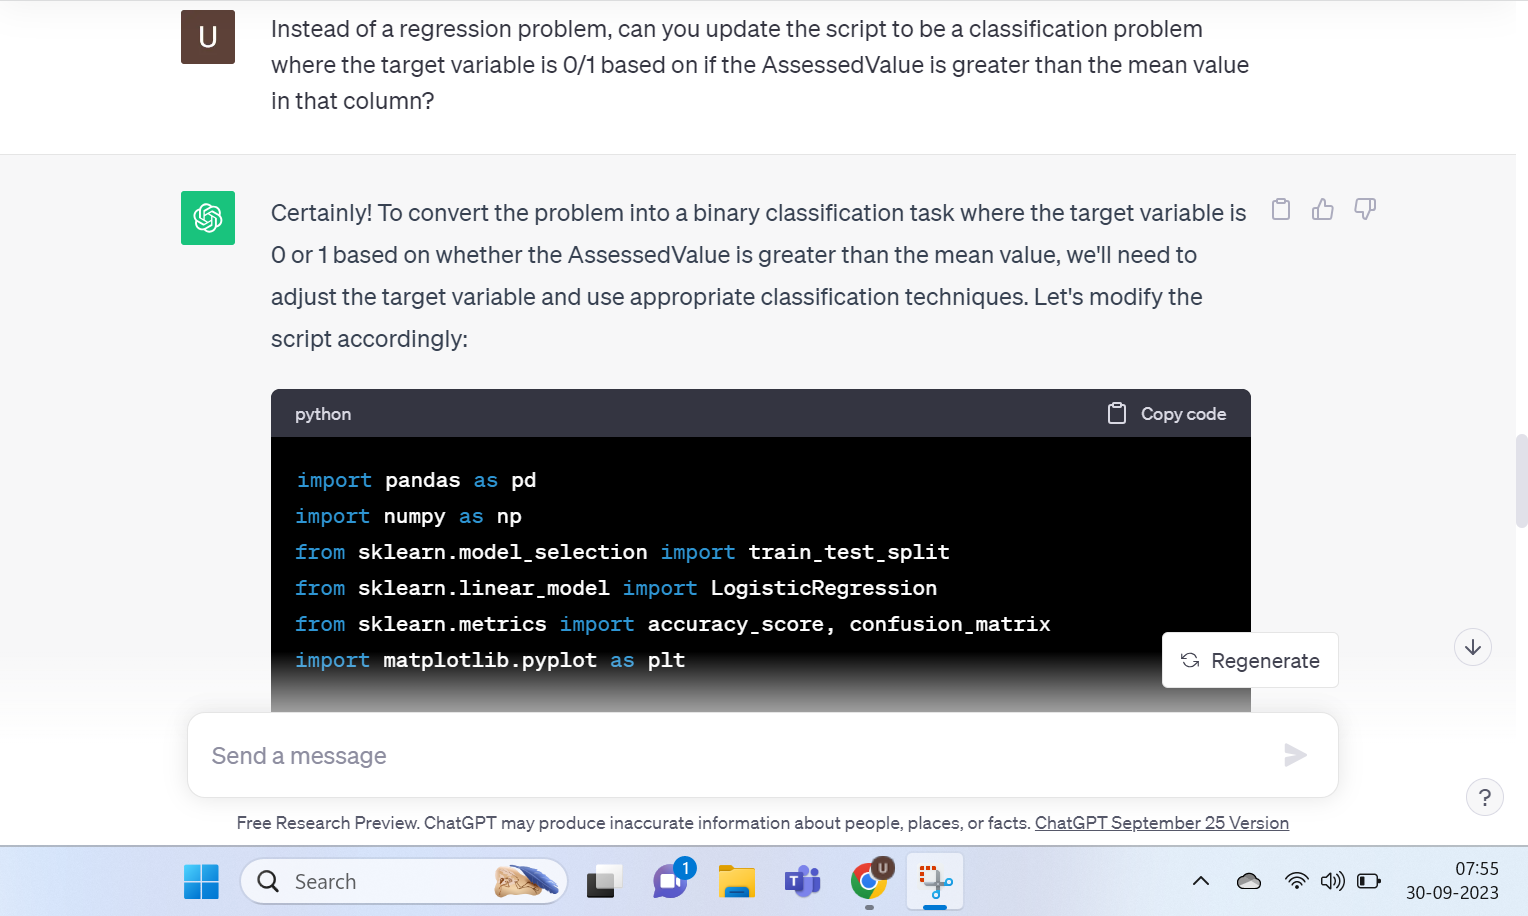

In [ ]:
# students: paste both a screenshot of your prompt and code

# (for academic integrity) and your actual ChatGPT python code here

## Your ChatGPT Code
Don't just copy/paste as one cell, make nice subheaders for each question please.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'df' is your original DataFrame

## Q1: Drop rows where AssessedValue is greater than 1 million USD

In [18]:
# Q1: Drop rows where AssessedValue is greater than 1 million USD
df = df[df['AssessedValue'] <= 1000000]

## Q2: Drop rows with missing values

In [19]:
# Q2: Drop rows with missing values
df.dropna(inplace=True)

## Q3: Check column types and examine the head of the DataFrame

In [20]:
# Q3: Check column types and examine the head of the DataFrame
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127055 entries, 1 to 145941
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               127055 non-null  int64  
 1   SerialNumber     127055 non-null  int64  
 2   ListYear         127055 non-null  int64  
 3   DateRecorded     127055 non-null  object 
 4   Town             127055 non-null  object 
 5   Address          127055 non-null  object 
 6   AssessedValue    127055 non-null  int64  
 7   SaleAmount       127055 non-null  float64
 8   SalesRatio       127055 non-null  float64
 9   PropertyType     127055 non-null  object 
 10  ResidentialType  127055 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 11.6+ MB
None
   ID  SerialNumber  ListYear DateRecorded     Town            Address  \
1   2         14011      2014    1/14/2015  Andover    1 JUROVATY LANE   
2   3         15006      2015   11/30/2015  Andover        1 R

## Q4: Count unique values in the Town column

In [21]:
# Q4: Count unique values in the Town column
unique_towns_count = df['Town'].nunique()
print("Unique Towns Count:", unique_towns_count)

Unique Towns Count: 169


## Q5: Create dummy variables for the Town column

In [22]:
# Q5: Create dummy variables for the Town column
tmp = pd.get_dummies(df['Town'])

## Q6: Create X DataFrame by subsetting AssessedValue, ListYear, and concatenating with tmp

In [23]:
# Q6: Create X DataFrame by subsetting AssessedValue, ListYear, and concatenating with tmp
X = pd.concat([df[['AssessedValue', 'ListYear']], tmp], axis=1)

## Q7: Convert AssessedValue to binary based on mean value

In [24]:
# Q7: Convert AssessedValue to binary based on mean value
mean_assessed_value = df['AssessedValue'].mean()
y = (df['AssessedValue'] > mean_assessed_value).astype(int)

## Q8: Convert X and y to numpy arrays and split the data into training and testing sets

In [25]:
# Q8: Convert X and y to numpy arrays and split the data into training and testing sets
# Replace '1234567' with your 7-digit student ID
seed = int('1234567')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## Q9: Fit a logistic regression model and calculate accuracy

In [26]:
# Q9: Fit a logistic regression model and calculate accuracy
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Accuracy (Train):", accuracy_train)
print("Accuracy (Test):", accuracy_test)

Accuracy (Train): 0.9997933965605447
Accuracy (Test): 0.999842587855653


## Q10: Create a confusion matrix and plot it

Confusion Matrix:
[[16598     1]
 [    3  8809]]


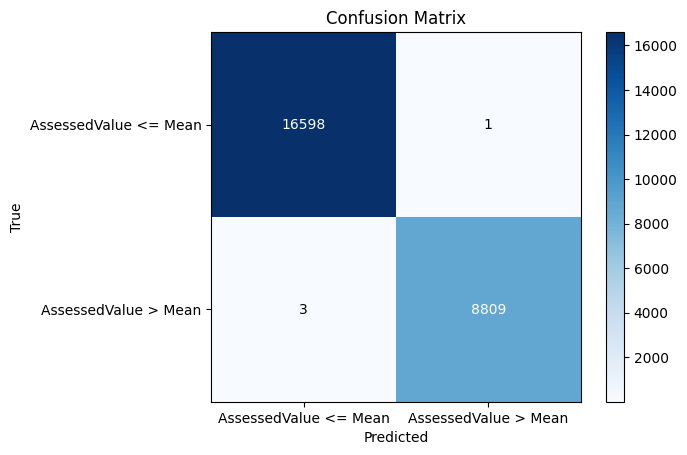

In [29]:
# Q10: Create a confusion matrix and plot it
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['AssessedValue <= Mean', 'AssessedValue > Mean']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()

# Part 2b: Compare and contrast with Dave's classification examples

Again, you now have an AI-generated code vs. the class materials - and I think you would agree both are pretty good! Take some time to the ChatGPT script vs. the class notes and come up with five observations of what is similar vs. different between the two examples. What is in Dave's materials that are not in the AI-generated code? And vice-versa?

### Observation 1

The optimized method to split the data into training and testing sets is exactly similar saving a couple of extra code lines.

### Observation 2

Use of plt.xticks and plt.yticks to adjust label position on x_axis and y-axis is new to learn.

### Observation 3

The use np.arange() function creates an array of regularly spaced values within a specified range is similar.

### Observation 4

Addition of text annotations using plt.text() is new to learn.

### Observation 5

plt.colorbar() method is a cool new method useful to enahance visualizations.

# ❗ On Your Own
No one will really care that you can ask ChatGPT to generate some code for you - ChatGPT and similar aids are just tools to help make you a better programmer. So here's what I would do if I were you -

1. Sit down in a quiet place and open a blank notebook.
2. See if you can recreate the code perfectly within 20 minutes. Do this once a day for the entire week.
3. By the end of the week, did you find you were able to code everything in less time? Could you get it down to five minutes? If so, then you really know your stuff!
4. Vanilla regression models are cool, but why not try to  incorporate penalized regression models, or ask ChatGPT to show the coefficients and p-values in the stats models and help you interpret them?!

Feel free to leave your results below if you'd like me to review them.